<a href="https://colab.research.google.com/github/omsai530/MachineLearning/blob/main/KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.datasets import load_iris

In [3]:
X,y = load_iris(return_X_y=True)
X,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape,y_train.shape

((105, 4), (105,))

In [5]:
knn=KNC(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [6]:
#finding the optimal k value
from sklearn.metrics import accuracy_score
k_range=list(range(1,30))
scores=[]
for k in k_range:
  knn = KNC(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  scores.append(accuracy_score(y_test,y_pred))
scores

[0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556]

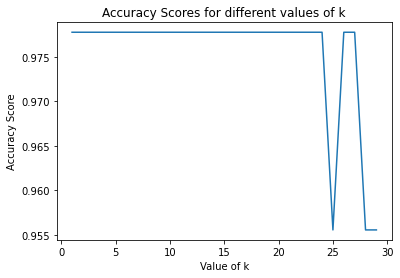

In [7]:
plt.plot(k_range,scores)
plt.xlabel("Value of k")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for different values of k")
plt.show()


In [16]:
#optimal k value if selected from graph where graph is constant
knn = KNC(n_neighbors=11)
knn.fit(X,y)
#Making Confusion_Matrix and finding the accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
con_mat=confusion_matrix(y_pred,y_test)
a_score=accuracy_score(y_test,y_pred)
#p_score=precision_score(y_test,y_pred)
#r_score=recall_score(y_test,y_pred)
print("Confusion Matrix :\n",pd.crosstab(y_pred,y_test, rownames = ["Predicted"], colnames = ["Actual"], margins=True))
print("Accuracy_Score : ",a_score)

Confusion Matrix :
 Actual      0   1   2  All
Predicted                 
0          16   0   0   16
1           0  16   0   16
2           0   2  11   13
All        16  18  11   45
Accuracy_Score :  0.9555555555555556
